## Introduction à la dérivée

- soit une fonction f(x)
- Sa dérivée, de manière intuitive, peut s’écrire comme
$$
f'(x) \approx \frac{f(x + h) - f(x)}{h} \quad \text{pour un petit } h
$$

Elle donne la **pente de la tangente** en ce point. Cela permet de savoir si l’on monte ou descend, et donc si l’on s’approche ou s’éloigne d’un minimum.

Comme on le verra un peu plus tard, cette notion va nous permettre de **faire une descente de gradient** sur la fonction d’erreur.

L’apprentissage ajuste les poids en suivant le gradient de la fonction d’erreur. Une fonction d’erreur quadratique est pratique car sa dérivée est simple et continue. Les neurones eux peuvent rester linéaires ou avoir des activations non-linéaires, ce qui permet au réseau de modéliser des relations complexes.

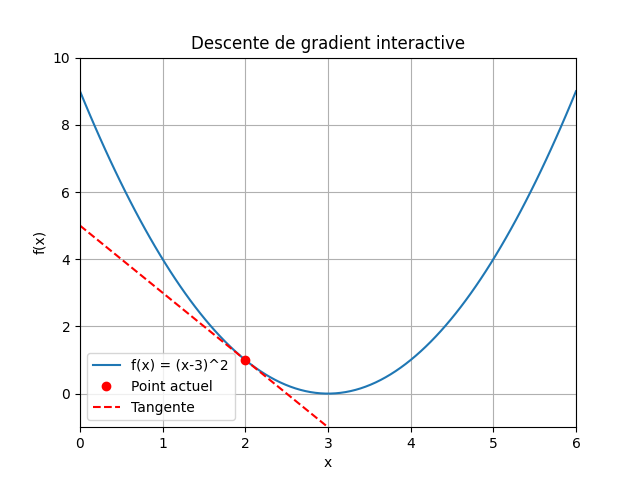

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatSlider, Output, VBox
from IPython.display import display

# Fonction et dérivée
def f(x):
    return (x-3)**2

def df(x):
    return 2*(x-3)

x = np.linspace(0, 6, 100)

# Crée la figure une seule fois
fig, ax = plt.subplots()
ax.plot(x, f(x), label="f(x) = (x-3)^2")       # la fonction
point, = ax.plot([], [], 'ro', label="Point actuel")  # point movable
tangent, = ax.plot([], [], 'r--', label="Tangente")  # tangente

ax.set_xlim(0, 6)
ax.set_ylim(-1, 10)
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.set_title("Descente de gradient interactive")
ax.legend()
ax.grid(True)

# Widget pour afficher la pente
out_slope = Output()

# Fonction pour mettre à jour point et tangente
def update(x0):
    y0 = f(x0)
    slope = df(x0)
    
    # Mettre à jour le point
    point.set_data([x0], [y0])
    
    # Mettre à jour la tangente
    tangent.set_data(x, y0 + slope*(x - x0))
    
    # Mettre à jour la figure
    fig.canvas.draw_idle()
    
    # Mettre à jour la pente
    with out_slope:
        out_slope.clear_output(wait=True)
        print(f"Slope at x0 = {x0:.2f} is {slope:.2f}")

# Slider interactif
slider = FloatSlider(value=2.0, min=-2.0, max=6.0, step=0.1, description='x0')
slider.observe(lambda change: update(change['new']), names='value')

# Affichage
display(VBox([slider, out_slope]))

# Initial update
update(slider.value)


## Descente de gradient de dimension 1

- Si on reprend $f(x) = (x - 3)^2$
- L'objectif est de minimiser cette fonction
- On pose:
  - le pas de differentiation: $h = 10^{-4}$
  - le taux d'apprentissage (learning rate): $\eta = 0.1$
- L'approximation de la dérivée est:
$$
\frac{df}{dx} = \frac{f(x + h) - f(x)}{h}
$$
- Si on part d'un valeur $x_n$, la valeur suivante est: $x_{n+1} = x_n - \eta * \frac{df}{dx}(x_n)$

In [2]:
# Les constantes
# NOTES: un h trop grand donne une mauvaise approximation, et trop petit peut conduire
#        a des erreurs d'arrondi.
h = 0.00001
n = 0.1

# Partons de x=8
x0 = 8
x1 = x0 - n * (f(x0 + h) - f(x0))/h
x2 = x1 - n * (f(x1 + h) - f(x1))/h
# Si on continue on va arriver à 3...
# Cela permet donc de minimiser la fonction
print(f"Step1={x0} -> Step2={x1} -> Step3={x2} -> ...")

Step1=8 -> Step2=6.999999000020011 -> Step3=6.199998200032468 -> ...


## Descente de gradient en dimension 2

- Prenons la fonction $g(x, y) = x^2 + y^2$
- Cette fois on va avoir une dérivé par rapport a x et une autre par rapport a y (dérivées partielles):
$$
\frac{\partial g}{\partial x} = \frac{g(x + h,y) - g(x,y)}{h} et \frac{\partial g}{\partial y} = \frac{g(x, y + h) - g(x, y)}{h} 
$$
- Le gradient en dimension 2 s'écrit donc:
$$
\nabla g(x,y) =
\left(
\frac{\partial g}{\partial x},
\frac{\partial g}{\partial y}
\right)
$$
- On va refaire la même chose qu'en dimension 1 mais sur les 2 derivées. On va donc partir d'un point $(x,y)$ et va calculer le point suivant qui va minimiser la fonction.
    - $x_{n+1} = x_n - \eta * \frac{\partial g}{\partial x}(x_n, y_n)$
    - $y_{n+1} = y_n - \eta * \frac{\partial g}{\partial y}(x_n, y_n)$
- Ce qui peut s'ecrire:
$$
(x_{n+1}, y_{n+1})
=
(x_n, y_n)
-
\eta
\begin{pmatrix}
\frac{\partial g}{\partial x}(x_n,y_n) \\
\frac{\partial g}{\partial y}(x_n,y_n)
\end{pmatrix}
$$

In [4]:
def g(x, y):
    return x * x + y * y

# NOTE: souvent on utilise plutot une autre approximation qui est la difference centree
#       (g(x+h) - g(x-h)) / h
#       cf les developpements de Taylor.
# NOTE: En pratique on va utiliser
#        -> la dérivée analytique
#        -> ou la différentiation automatique (PyTorch, TensorFlow, JAX..)
def dg_dx(x, y):
    return (g(x + h, y) - g(x, y))/h

def dg_dy(x, y):
    return (g(x, y + h) - g(x, y))/h

x0, y0 = 5,6
x1, y1 = x0 - n*dg_dx(x0,y0), y0 - n*dg_dy(x0,y0)
x2, y2 = x1 - n*dg_dx(x1,y1), y1 - n*dg_dy(x1,y1)
# Et si on continue on va arriver au point qui minimise la fonction

print(f"Step1({x0},{y0}) -> Step2({x1},{y1}) -> Step3({x2},{y2})")


Step1(5,6) -> Step2(3.9999990000910657,4.799999000027583) -> Step3(3.1999982001212857,3.8399982000354385)


## Regle de la chaine, backpropagation

- La règle de la chaine est une propagation de la dérivée à travers plusieurs fonctions dérivées.

### Structure d'un neurone
- Un neurone effectue trois opérations principales:
1. Un neurone calcule une somme pondérée des entrées: $z = x_1 w_1 + x_2 w_2 + \dots + x_n w_n + b$ ou:
    - $w_n$ sont les poids (paramètres a apprendre)
    - $b$ est le biai
    - $z$ est la valeur intermédiaire (avant activation)
1. On applique ensuite une fonction de declenchement (activation), par exemple un sigmoide:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

1. Fonction de coût (erreur)
Pour mesurer l’erreur entre la prédiction et la vraie valeur (t), on utilise par exemple une erreur quadratique :

$$
L = (y - t)^2
$$